Importar librerias necesarias.

In [9]:
from google.colab import drive

# 1.) Carga de datos

Conexion con google drive

In [10]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Es posible ejecutar comandos BASH usando el indicador "!"

In [11]:
!cd drive

## 1.1) archivos .txt

Abrir el archivo

In [12]:
path = '/content/drive/MyDrive/Diplomado ML&BD/Documentos sesion 1/General/archivo.txt'

print('-'*100)
file = open(path)
print(file)
print(file.read())
print(file.read())

print('-'*100)
file.seek(0)
print(file.read())

----------------------------------------------------------------------------------------------------
<_io.TextIOWrapper name='/content/drive/MyDrive/Diplomado ML&BD/Documentos sesion 1/General/archivo.txt' mode='r' encoding='UTF-8'>
Esta es una nueva línea!
Esta es una nueva línea del archivo

----------------------------------------------------------------------------------------------------
Esta es una nueva línea!
Esta es una nueva línea del archivo


Abrir cadalinea del archivo

In [14]:
path = '/content/drive/MyDrive/Diplomado ML&BD/Documentos sesion 1/General/archivo.txt'

file = open(path)
file.seek(0)
contenido = file.readlines()

print(contenido)
print('-'*100)

for linea in contenido:
    print(linea.split())

file.close()

['Esta es una nueva línea!\n', 'Esta es una nueva línea del archivo']
----------------------------------------------------------------------------------------------------
['Esta', 'es', 'una', 'nueva', 'línea!']
['Esta', 'es', 'una', 'nueva', 'línea', 'del', 'archivo']


Modos de apertura 

In [ ]:
path = '/content/drive/MyDrive/Diplomado ML DL/Files/Sesion 1/archivo.txt'


file = open(path,'w+')
file.write('Esta es una nueva línea!')
file.seek(0)
contenido = file.readlines()
print(contenido)
file.close() 
print('-'*100)

file = open(path,'a+')
file.write('\nEsta es una nueva línea del archivo')
file.seek(0)
contenido = file.readlines()
print(contenido)
file.close() 
print('-'*100)


file = open(path,'r')
file.seek(0)
contenido = file.readlines()
print(contenido)
file.close() 

['Esta es una nueva línea!\n', 'Esta es una nueva línea del archivo']




*   W+: sobrescribir el archivo 
*   a+: añadir lineas al archivo
*   r: modo de solo lectura



### Ejercicio

A continuación se le dará un archivo. txt con opiniones de diferentes usuarios sobre distintos productos, abra él archivó y extraiga los usuarios y sus comentarios, gradando la información obtenida en dos archivos separados:

In [25]:
import re
path = '/content/drive/MyDrive/Diplomado ML&BD/Documentos sesion 1/ejercico_1/Cell_Phones_and_Accessories'
file = open(path, "r")
contenido = file.read()

ids = re.findall(r"\w+@\S+@@\w+\|\w+\|.1:", contenido)

file = open("id.txt", 'a+')
for id in ids:
  file.write(id+'\n')
file.close()

comments = re.findall(r":.+\n", contenido)

file = open("comments.txt", 'a+')
for comment in comments:
  file.write(comment)
file.close()

## 1.2) archivo .pdf

In [26]:
!pip install PyPDF2

     |████████████████████████████████| 77 kB 2.9 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61102 sha256=2c49aa8e3f23d32f31581ba24fc4d6f79990398ed9d932dc6d4fdf022be05fbc
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


Leer archivo PDF

In [ ]:
import PyPDF2

path = '/content/drive/MyDrive/Diplomado ML&BD/Documentos sesion 1/General/lecun.pdf'
file = open(path,'rb')
pdf_reader = PyPDF2.PdfFileReader(file)
print(f'numero de páginas: {pdf_reader.numPages}')
print('-'*100)

pag = pdf_reader.getPage(0) 
texto = pag.extractText()
print(texto)
file.close()

Crear archivo PDF

In [28]:
pdf_writer = PyPDF2.PdfFileWriter()
pdf_writer.addPage(pag)
with open("test.pdf", "wb") as f:
    pdf_writer.write(f)

### Ejercicio

A continuación se le dará un archivo. PDF con el reporte clínico de un paciente, extraiga únicamente la información correspondiente a la descripción médica y guárdela nuevamente en un archivo .PDF

In [41]:
path = '/content/drive/MyDrive/Diplomado ML&BD/Documentos sesion 1/ejercico_2/TCGA-A2-A0SX.pdf'
file = open(path,'rb')
pdf_reader = PyPDF2.PdfFileReader(file)
n = pdf_reader.numPages

for i in range(n):
  pag = pdf_reader.getPage(i)
  text = pag.extractText()
  print(text)
  print("-"*100)
  if("FINAL DIAGNOSIS" in text):
    pdf_writer = PyPDF2.PdfFileWriter()
    pdf_writer.addPage(pag)
    with open("diagnostico.pdf", "wb") as f:
      pdf_writer.write(f)

file.close()

jtb-0-3 ,M^Jtii-/ 1 '- gyros K^O°^3Coo",s;TC :, NOSso-'5,0. q ,-FOR OFFICIAL U81 ONLY - PIRBONAL DATA-PRIVACY ACT 01 1974SURGICAL PATHOLOGY REPORTPatient:FMP/SSN:DOB/Age/Sex:Location:Physician(s):' Race: WHITESpecimen #:Taken:Received:Reported:SPECIMEN:A: LEFT BREAST LUMPECTOMY B: LEFT AXILLARY CONTENTSC: SENTINEL NODE #1FINAL DIAGNOSIS:A. BREAST,LEFT,LUMPECTOMY:- TUMOR TYPE:INFILTRATING DUCTAL CARCINOMA- NOTTINGHAM GRADE:POORLY DIFFERENTIATED(Grade 3)- NOTTINGHAM SCORE:9 OF 9(Tubules=3, Nuclei= 3, Mitoses=3; mitoticcount 24 per 10 high power fields at 40x power)- TUMOR SIZE: MULTIFOCAL,LARGEST CONTIGUOUS FOCUS 1.3 CM (Gross® measurement)- MICROCALCIFICATIONS:NONE IDENTIFIED-VENOUS/LYMPHATIC INVASION:PRESENT- MARGINS:- INFILTRATING CARCINOMA 0.8 MM FROM ANTERIOR MARGIN(Slide A10)- FOCI OF ANGIOLYMPHATIC INVASION 0.2 MM FROM POSTERIOR MARGIN(Slide A2)- INTRADUCTAL COMPONENT:DCIS, FOCAL,HIGH GRADE- LYMPH NODES: NEGATIVE(See parts B and C)- NIPPLE:NOT SAMPLED- SKIN:NOT SAMPLED- HORMONE RE

## 1.3) archivos .json


leer archivo 

In [42]:
import json

path = '/content/drive/MyDrive/Diplomado ML&BD/Documentos sesion 1/General/fruits.json'
with open(path) as f:
    fruits = json.load(f)
print(fruits)

{'orange': 'naranja', 'pineaple': 'piña', 'manzana': 'apple'}


Escribir archivo 

In [43]:
data = {
        "perro": "dog",
        "gato": "cat",
        "pajaro": "bird"
        }

with open("animales.json", 'w') as f:
    json.dump(data, f)

### Ejercicio

A continuación se le dará un archivo diferentes archivos .JSON donde se encuentra el reporte de experimentos de un modelo de ML, ábralos y encuentre el experimento con el mayor índice C.

In [55]:
import numpy as np
path = "/content/drive/MyDrive/Diplomado ML&BD/Documentos sesion 1/ejercicio_3/"
C = []
for i in range(4):
  with open(path + str(i) +".json", 'r') as f:
    experiment_result = json.load(f)
  c = experiment_result["val_c_index"]
  C.append(c)
np.argmax(C)

1

# 2.) *Web scraping*

El web scraping es una técnica que permite extraer datos e información de una web

In [56]:
!pip install beautifulsoup4
!pip install lxml
!pip install requests

## 2.1) Que es una pagina web


Las páginas web son documentos estructurados formados por una jerarquía de elementos. El primer paso para extraer información es identificar correctamente el elemento o elementos que contienen la información deseada.

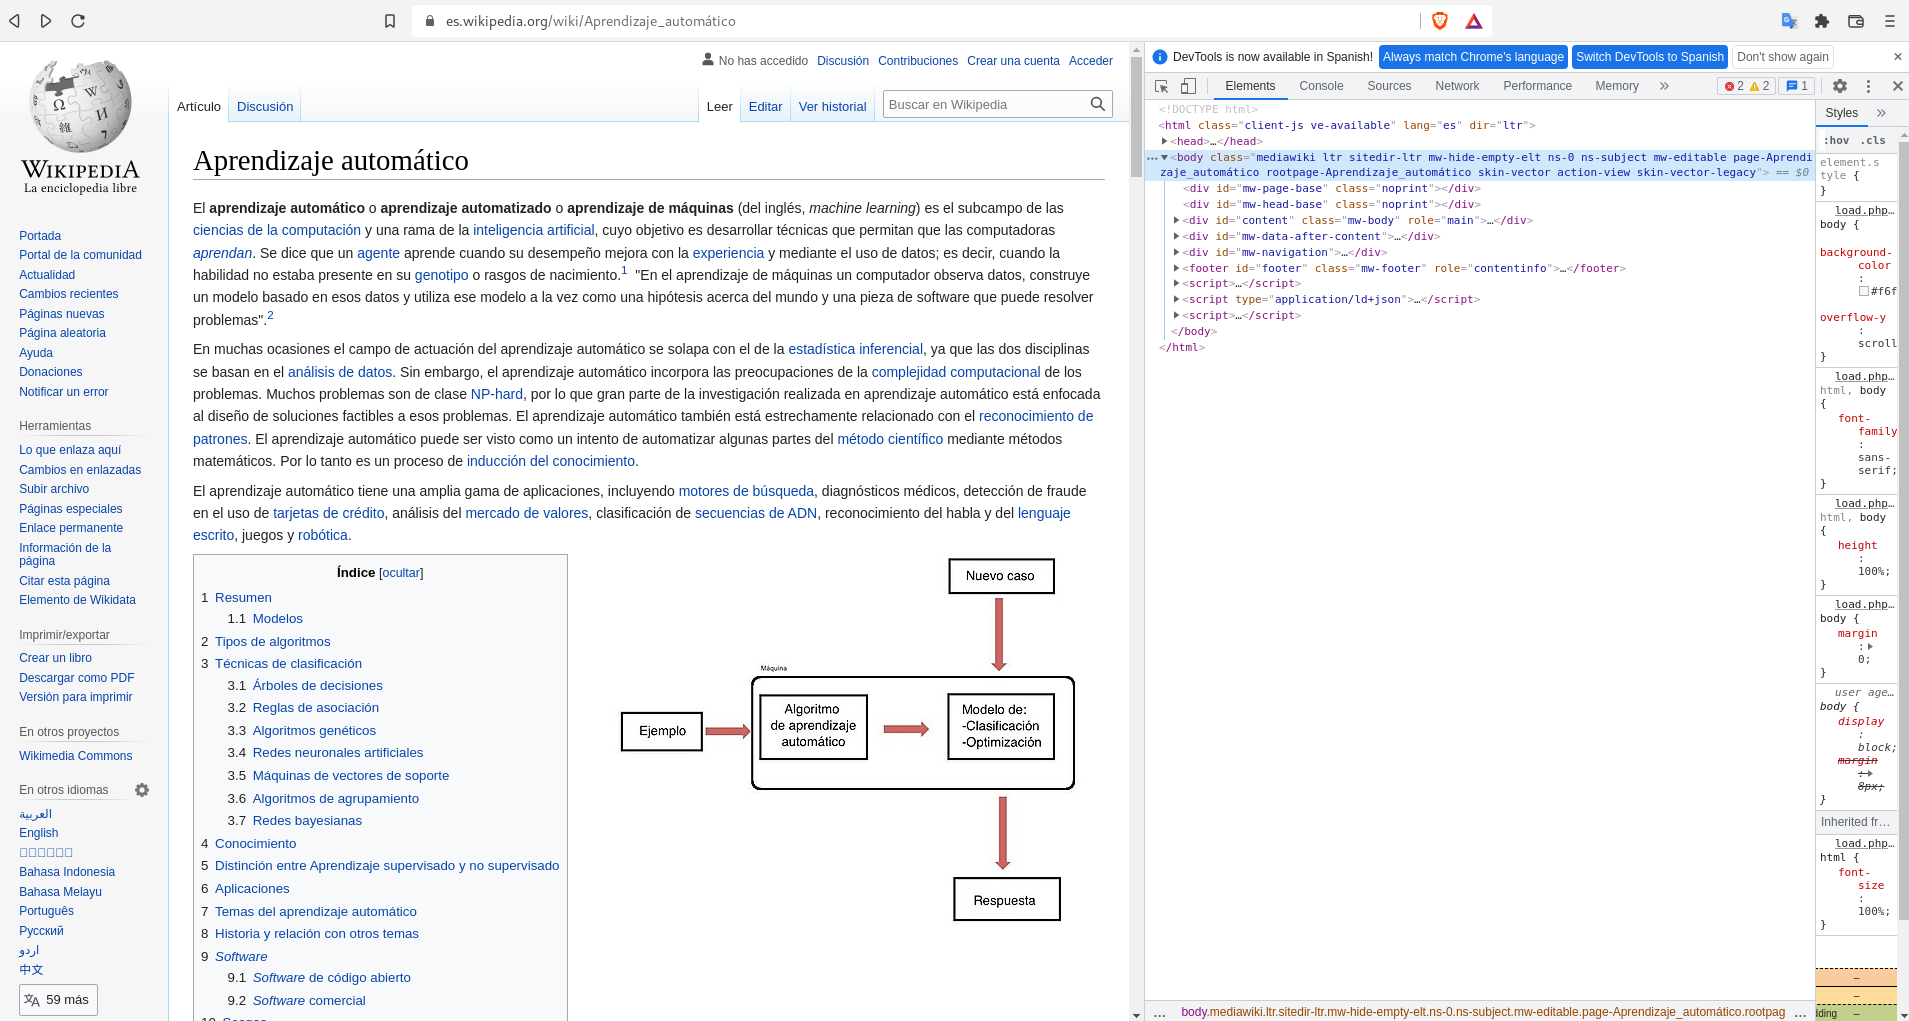

## 2.2) Extraer la información de la pagina web

In [ ]:
import requests
from bs4 import BeautifulSoup

web = requests.get('https://es.wikipedia.org/wiki/Aprendizaje_autom%C3%A1tico')
soup = BeautifulSoup(web.text, 'lxml')
print(soup)

### Ejercicio

Teniendo en cuenta la lectura realizada extraiga los párrafos de html usando regex, recuerde que su señalización usa los indicadores <p> </p>

In [63]:
parrafos = re.findall(r"<p>.*>", str(soup))
print(parrafos[0])

<p>El <b>aprendizaje automático</b> o <b>aprendizaje automatizado</b> o <b>aprendizaje de máquinas</b> (del inglés, <i>machine learning</i>) es el subcampo de las <a href="/wiki/Ciencias_de_la_computaci%C3%B3n" title="Ciencias de la computación">ciencias de la computación</a> y una rama de  la <a href="/wiki/Inteligencia_artificial" title="Inteligencia artificial">inteligencia artificial</a>, cuyo objetivo es desarrollar técnicas que permitan que las computadoras <i><a href="/wiki/Aprendizaje" title="Aprendizaje">aprendan</a></i>. Se dice que un <a href="/wiki/Agente_inteligente_(inteligencia_artificial)" title="Agente inteligente (inteligencia artificial)">agente</a> aprende cuando su desempeño mejora con la <a href="/wiki/Empirismo" title="Empirismo">experiencia</a> y mediante el uso de datos; es decir, cuando la habilidad no estaba presente en su <a href="/wiki/Genotipo" title="Genotipo">genotipo</a> o rasgos de nacimiento.<sup class="reference separada" id="cite_ref-russell_1-0"><a

## 2.3) Encontrar elementos

Traer elementos por etiquetas

In [66]:
parrafos = soup.find_all('p')
print(parrafos)
print('-'*100)

parrafos = soup.find_all('p', limit=1)
print(parrafos)

[<p>El <b>aprendizaje automático</b> o <b>aprendizaje automatizado</b> o <b>aprendizaje de máquinas</b> (del inglés, <i>machine learning</i>) es el subcampo de las <a href="/wiki/Ciencias_de_la_computaci%C3%B3n" title="Ciencias de la computación">ciencias de la computación</a> y una rama de  la <a href="/wiki/Inteligencia_artificial" title="Inteligencia artificial">inteligencia artificial</a>, cuyo objetivo es desarrollar técnicas que permitan que las computadoras <i><a href="/wiki/Aprendizaje" title="Aprendizaje">aprendan</a></i>. Se dice que un <a href="/wiki/Agente_inteligente_(inteligencia_artificial)" title="Agente inteligente (inteligencia artificial)">agente</a> aprende cuando su desempeño mejora con la <a href="/wiki/Empirismo" title="Empirismo">experiencia</a> y mediante el uso de datos; es decir, cuando la habilidad no estaba presente en su <a href="/wiki/Genotipo" title="Genotipo">genotipo</a> o rasgos de nacimiento.<sup class="reference separada" id="cite_ref-russell_1-0"><

Traer elementos por clase CSS

In [78]:
b_contenido = soup.find_all(class_='floatright')
print(b_contenido)

[<table class="hlist navbox-inner" style="border-spacing:0;background:transparent;color:inherit"><tbody><tr><th class="navbox-group" scope="row" style="width: 12%; text-align:center;"><a href="/wiki/Control_de_autoridades" title="Control de autoridades">Control de autoridades</a></th><td class="navbox-list navbox-odd" style="text-align:left;border-left-width:2px;border-left-style:solid;width:100%;padding:0px"><div style="padding:0em 0.25em">
<ul><li><b>Proyectos Wikimedia</b></li>
<li><span style="white-space:nowrap;"><a href="/wiki/Wikidata" title="Wikidata"><img alt="Wd" data-file-height="590" data-file-width="1050" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Wikidata-logo.svg/20px-Wikidata-logo.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Wikidata-logo.svg/30px-Wikidata-logo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Wikidata-logo.svg/40px-Wikidata-logo.svg.png 2x" width="20"/></a> Datos:</span>

### Ejercicio

Usando el siguiente: https://es.wikipedia.org/wiki/Sistema_Internacional_de_Unidades enlace, extraiga la tabla de las siete unidades básicas:

In [89]:
import pandas as pd
web = requests.get('https://es.wikipedia.org/wiki/Sistema_Internacional_de_Unidades')
soup = BeautifulSoup(web.text, 'lxml')
tabla = soup.find_all("table", class_="wikitable", limit=1)
tabla_df = pd.read_html(str(tabla))[0]
tabla_df

,Unidad básica(símbolo),Magnitud física básica[Símbolo de la magnitud],Definición técnica,Definición derivada
0,segundo(s),tiempo [t],Se define al fijar el valor numérico de la fre...,Es la duración de 9 192 631 770 periodos de la...
1,metro(m),longitud [l],Se define al fijar el valor numérico de la vel...,Es la longitud del trayecto recorrido por la l...
2,kilogramo[nota 2]​(kg),masa [m],Se define al fijar el valor numérico de la con...,NaN
3,amperio(A),corriente eléctrica [I],Se define al fijar el valor numérico de la car...,El efecto de esta definición es que el amperio...
4,kelvin(K),temperatura termodinámica [T],Se define al fijar el valor numérico de la con...,Es igual a la variación de temperatura termodi...
5,mol(mol),cantidad de sustancia [N],Cantidad de sustancia de exactamente 6.022 140...,Es la cantidad de sustancia de un sistema que ...
6,candela(cd),intensidad luminosa [Iv],Se define al fijar el valor numérico de la efi...,"Es la intensidad luminosa, en una dirección da..."


# Acceso cuenta twitter
*  Acceda al siguiente enlace: https://developer.twitter.com/en/apply-for-access.
*  Haga click sobre ”apply for a developer account”.
*  Seleccione ”Academic” y luego ”Student”.
*  Haga click sobre ”get started” en la sección de ”Standard application”.
*  Vincule su número de celular a la cuenta de twitter, dando click en ”add phone number”. Esto lo direccionará a una nueva pestaña, siga las intrucciones.
*  Vuelva a la penstaña inicial de ”Developer Portal” e ingrese su país de procedencia y demás datos solicitados. En caso de que no aparezcan estos campos, vuelva a cargar la página.
*  Haga click sobre ”Next” y llene los campos requeridos acerca de cómo planea usar los datos de Twitter (debe hacerlo en inglés).
*  Haga click en ”Next” y acepte los términos.
*  Haga click en ”Submit application”.
*  Finalmente, confirme su email por medio del correo de verificación enviado por twitter.

